# Numpy Arrays

Numpy is the highly-optimized, super-fast workhorse that underlies much of the scientific computing stack see Harris et al. 2020 in Nature for evidence.


In [ ]:
import numpy as np

# We're also going to want to look at matrices, so let's import matplotlib too.
# this import statement is more complex, but of key importance, it creates a plt object we'll use later
import matplotlib.pyplot as plt

# Create a 1 dimensional array 15 elements long. np.arange is a FAST version of python range()
a = np.arange(15)

print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


Now plot this ultra simple array using matplotlib.

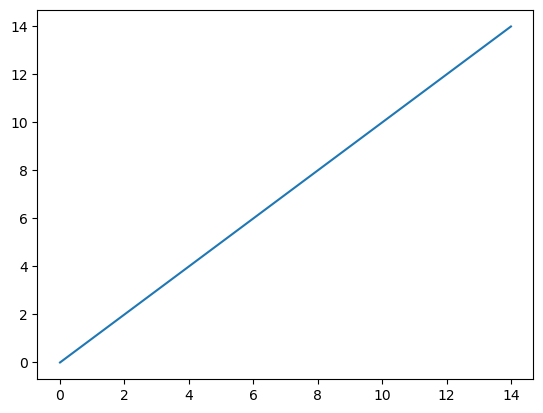

In [ ]:
plt.plot(a)
plt.show()

Reshape our array into a 2 dimensional array of size 3 by 5.

NOTE, numpy, and about 60% of computer programming, denotes things in terms of Row then Column (RC order) but some things, especially those that regard displaying pixels, denote things as x, y (which note is CR order)

In [ ]:
a = np.arange(15).reshape(3, 5)

print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


That makes sense and kind we can kinda visualize the array in our head. Let's plot it.

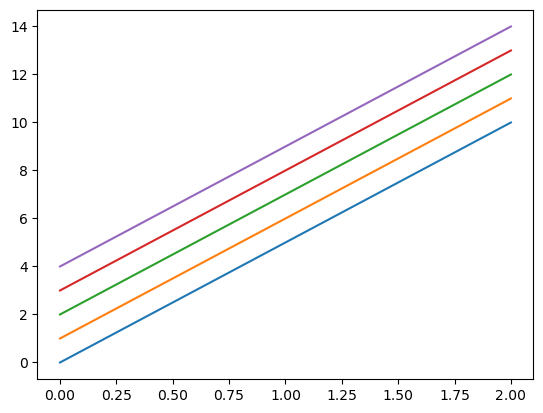

In [ ]:
plt.plot(a)
plt.show()

The above show probably is not what you expected. It has interpreted it as five different lines, but we probably meant to
think of it as a matrix. For this, use imshow() rather than plot().

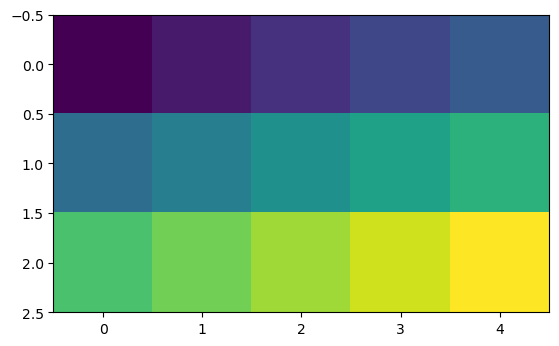

In [ ]:
plt.imshow(a)
plt.show()

## Arrays as objects

The a variable we defined holds much more information than jsut the raw values. It also gives us useful information necessary for working with really big data.

In [ ]:
# a is an OBJECT, which has lots of useful attributes, such as:
array_shape = a.shape
print(array_shape)
print(a.ndim)
print(a.dtype.name)
print(a.size)
print(a.itemsize) #8 Pro-level question. Why does this return 8? Hint 8 * 8 = 64.
print(type(a)) 

(3, 5)
2
int64
15
8
<class 'numpy.ndarray'>


## Creating an array from values

In [ ]:
a = np.array([1,2,3,4])  # RIGHT
# a = np.array(1,2,3,4)    # WRONG: TypeError: array() takes from 1 to 2 positional arguments but 4 were given. Uncomment this to see what happens with error handling.

# 2d version
b = np.array([(1.5,2,3), (4,5,6)])

print('b\n', b)

b
 [[1.5 2.  3. ]
 [4.  5.  6. ]]


In [ ]:
# Creating an empty array of zeros # NOTICE the extra paranetheses.
np.zeros((3, 4))

# or ones.
np.ones((2, 3), dtype=np.int16)                # dtype can also be specified

# or ones.
r = np.random.random((3, 4))                # dtype can also be specified
# print('r', r)

# Or even faster, just "allocate the memory" with an empty matrix.
c = np.empty((2,3))

## Array math

Numpy is super smart about doing matrix math across multiple dimensions. Note how in the below, it correctly guesses we wanted to add things element-wise.

In [ ]:
# Array math
a = np.array([20, 30, 40, 50.])
b = np.arange(4)

c = a-b

print('a', a)
print('b', b)
print('c', c)

a [20. 30. 40. 50.]
b [0 1 2 3]
c [20. 29. 38. 47.]


In [ ]:
# ** is the exponent operator in python
d = b**2
print('d', d)

# Numpy also has handy array-enabled math operators
e = 10*np.sin(a)
print('e', e)

# Con also create conditional arrays
f = a<35
print('f', f)

d [0 1 4 9]
e [ 9.12945251 -9.88031624  7.4511316  -2.62374854]
f [ True  True False False]


## Slicing Arrays

Sometimes you want to operate on a subset of an array. Slicing provies a high-performance way of doing this.

In [ ]:
a = np.arange(10)
b = np.arange(12).reshape(3, 4)
print(a)
print(b)

# Can access items directly, but need as many indices as there are dimensions
first_value = a[2]
second_value = b[2, 3]
print(first_value)
print(second_value)

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
2
11


In [ ]:
# Can also access "slices", which are denoted Start, Stop, Stepsize
r = a[1: 9: 2]
print(r)

[1 3 5 7]


In [ ]:
# If you leave out the number and just have the colon, that means you want to use the default. So below, the
# ::2 is interpretted as Start:End:Every-Other.
# 3:: would be Start at the third:End:All.
# :: would just be all the values.
r = a[::2]
print(r)

[0 2 4 6 8]


In [ ]:
# A single colon means also means use the full thing.
r = a[:]
print(r)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Using slices, you can also set individual elements in the array:
r[0] = 33
r[3:5] = 44
print('r', r)

r [33  1  2 44 44  5  6  7  8  9]


In [ ]:
# Setting in this way also can be done according to a condition:
r[r <= 6] = 5
print('r', r)

r [33  5  5 44 44  5  5  7  8  9]


In [ ]:
# Finally, an alternate and possibly more powerful way of setting conditional values is the np.where function
# This function sets anywhere greater than 10 to be 12, otherwise it keeps it at whatever value was already in r
r = np.where(r > 10, 12, r)
print('r', r)

r [12  5  5 12 12  5  5  7  8  9]


Finally, if you want to combine conditionals, when you're working inside an array you need to use Parentheses, & for and and | for or, as below.

In [ ]:
d[(d > 200) & (d < 10000)] = 33

# In-class Exercise 4.1

Create 1D array 35 elements long using np.arange(). Reshape it into a 2D array of size 5 by 7. Then, use for loops to iterate through each array cell and multiply the value by what row it is in. 


In [ ]:
# Starter code 

# Might want to use matrix.shape[0] and matrix.shape[1] to get the number of rows and columns
# for row in range():
#     for col in range():
#         do_something


## Let's talk about performance

Big data requires fast algorithms. What we did above was SLOW!Let's introduce a slow way of applying an algorithm, and then the fast way.

In [ ]:
a = np.arange(20)
# Slowly looping over arrays
for i in a:
    r = i**(1/3.)
print('r', r)

r 2.668401648721945


In [ ]:
# Slowly loop to get the sum of the array
r = 0
b = np.arange(20).reshape(4, 5)
for row in b:
    print('row', row)
    for value in row:
        print('value', value)
        r += value

print('slow sum', r)

row [0 1 2 3 4]
value 0
value 1
value 2
value 3
value 4
row [5 6 7 8 9]
value 5
value 6
value 7
value 8
value 9
row [10 11 12 13 14]
value 10
value 11
value 12
value 13
value 14
row [15 16 17 18 19]
value 15
value 16
value 17
value 18
value 19
slow sum 190


NOTE: Iterating over arrays here is just for illustration as it is VERY VERY SLOW
and loses the magic of numpy speed. We'll learn how to bet around this later
by "vectorizing" functions, which basically means batch calculating
everything in a vector all in one call. For now, here's an example of the
much faster version

In [ ]:
r = b.sum()
print('fast sum', r)

fast sum 190


## Diving into vectorized computation.

Here we are going to do matrix math, but using the fast numpy methods.

In [ ]:
# Vectorized multiplication (and broadcasting):

# First lets make two arrays. This is the cannonical way of making example arrays
a = np.arange(20).reshape(5, 4)
b = np.arange(20).reshape(5, 4)
print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [ ]:
c = a * b # NOTE: this does element-wise multiplication, not the matrix multiplication you learned in 7-th? grade.
print(c)

[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]
 [256 289 324 361]]


## Numpy broadcasting

Numpy will smartly "broadcast" two matrices of different sizes or dimensions so that it works:

In [ ]:
d = np.arange(4)
e = a * d # WAIT! Aren't you multiplying two different matrices with different sizes? Yes!
print(e)

[[ 0  1  4  9]
 [ 0  5 12 21]
 [ 0  9 20 33]
 [ 0 13 28 45]
 [ 0 17 36 57]]


Above,  Numpy smartly figured out how the two dimensions could be repeatedly broadcast to each other so the math was "well defined."

In [ ]:
# Also means you can use the same notation to multiply an array (2dim) against a scalar (0dim):
f = a * 6.0
print('f\n', f)

f
 [[  0.   6.  12.  18.]
 [ 24.  30.  36.  42.]
 [ 48.  54.  60.  66.]
 [ 72.  78.  84.  90.]
 [ 96. 102. 108. 114.]]


Let's plot the results of this new f matrix we created.

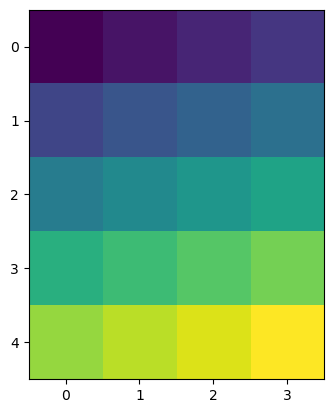

In [ ]:
ax = plt.imshow(b)
plt.show()

Looks very similar to above, so let's add a colorbar to make clear this value is not just our starting array.

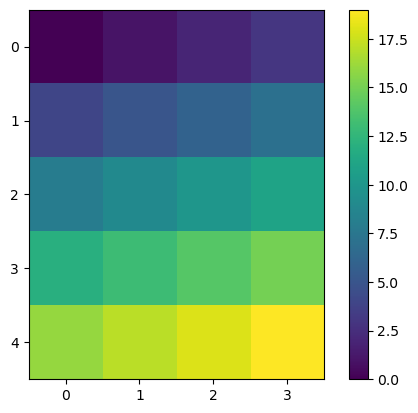

In [ ]:
ax = plt.imshow(b)
plt.colorbar(ax)
plt.show()

## Plot Mandlebrot

With these tools, we can do all sorts of things. Just for fun, let's end this section by defining a function for the Mandlebrot set and then plotting the function.

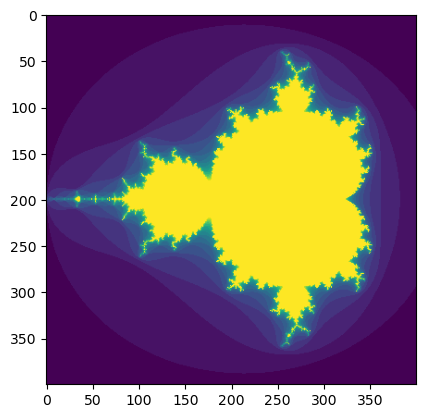

In [ ]:
def mandelbrot(h, w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime


plt.imshow(mandelbrot(400, 400))
plt.show()

## In-class exercise 4.2:

Again, I'll call on a random table to showcase their results.

1. Create a 20 by 40 matrix of random values 0-1 (Hint: use the np.random.random function. Use VS Code's built-in help to see what you should enter).
2. Set the upper left quadrant to 1. (Hint: use slices) 
3. Next, set the last COLUMN to 2.
4. Finally, change all values less than .5 to be 3. (Use np.where)

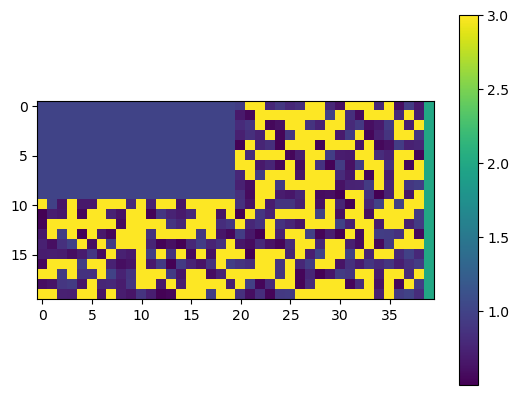

In [ ]:
# Class activity workspace

m = np.random.random((20,40))

m[:10, :20] = 1

m[:, -1] = 2

m = np.where(m < 0.5, 3.0, m)

plt.imshow(m)
plt.colorbar()